In [1]:
from IPT import Particle, ParticleSystem, RK4, f
import numpy as np
import matplotlib.pyplot as plt
import ase.data

atomic_masses = { k: ase.data.atomic_masses[v] 
                 for k,v in ase.data.atomic_numbers.items() }
print(atomic_masses)

{'X': 1.0, 'H': 1.008, 'He': 4.002602, 'Li': 6.94, 'Be': 9.0121831, 'B': 10.81, 'C': 12.011, 'N': 14.007, 'O': 15.999, 'F': 18.998403163, 'Ne': 20.1797, 'Na': 22.98976928, 'Mg': 24.305, 'Al': 26.9815385, 'Si': 28.085, 'P': 30.973761998, 'S': 32.06, 'Cl': 35.45, 'Ar': 39.948, 'K': 39.0983, 'Ca': 40.078, 'Sc': 44.955908, 'Ti': 47.867, 'V': 50.9415, 'Cr': 51.9961, 'Mn': 54.938044, 'Fe': 55.845, 'Co': 58.933194, 'Ni': 58.6934, 'Cu': 63.546, 'Zn': 65.38, 'Ga': 69.723, 'Ge': 72.63, 'As': 74.921595, 'Se': 78.971, 'Br': 79.904, 'Kr': 83.798, 'Rb': 85.4678, 'Sr': 87.62, 'Y': 88.90584, 'Zr': 91.224, 'Nb': 92.90637, 'Mo': 95.95, 'Tc': 97.90721, 'Ru': 101.07, 'Rh': 102.9055, 'Pd': 106.42, 'Ag': 107.8682, 'Cd': 112.414, 'In': 114.818, 'Sn': 118.71, 'Sb': 121.76, 'Te': 127.6, 'I': 126.90447, 'Xe': 131.293, 'Cs': 132.90545196, 'Ba': 137.327, 'La': 138.90547, 'Ce': 140.116, 'Pr': 140.90766, 'Nd': 144.242, 'Pm': 144.91276, 'Sm': 150.36, 'Eu': 151.964, 'Gd': 157.25, 'Tb': 158.92535, 'Dy': 162.5, 'Ho': 1

time integration Runge-kutta-4 

In [2]:
"Dette script udregner truncation error ved ... simulation pts - for at finde en slope på ~4 for RK4"
# 100 gyroperioder
# sidste r vektor -> regn radius ud
# fejlen ifht radius =... 
# 
# for dt = ... 
# 
# log()
# => slope ~4 

# den fandt at error aftog som ~4.8 - nok skyldes en symmetri ved cirkelbevægelser

'Dette script udregner truncation error ved ... simulation pts - for at finde en slope på ~4 for RK4'

In [3]:
plt.rcParams.update({
             'axes.labelsize': 18,
             'axes.titlesize': 20,
             'xtick.labelsize': 16,
             'ytick.labelsize': 16,
             'axes.linewidth': 0.5,
             'legend.fontsize': 16,
             'legend.title_fontsize': 18,
             'axes.titlepad': 10
                            })

This is for the error plot of RK4 - by increasing timestep dt 


In [4]:
# setting constants 
mp=1.672621e-27 # mass proton, [mp]=kg
mn=1.674927e-27 # mass neutron, [mn]=kg
me=9.109382e-31 # mass electron, [me]=kg
m_amu=1.660539e-27 # Dalton, [m_amu]=kg
qe=1.602176e-19 # elementary charge, [qe]=C
kB=1.380e-23
###

Relevant time, and velocity scales

In [5]:
T_eV=1e1 #[T_eV]=eV, char temp in outer edge ~10eV # make this into a distribution later
T_K=(kB/qe)**-1*T_eV # J/K*(J/eV)**-1= eV/K so invert => 1e4 K/eV
Z_W=184
ms=Z_W*mp


def omega_cs(qs,B,ms):
    # q charge in integer (integers elementary charge)
    # B in tesla
    # ms in kg
    q=qs*qe
    return abs(q)*B/ms

def tau_cs(qs,B,ms):
    return (omega_cs(qs,B,ms)/(2*np.pi))**-1

def vth(T_eV,ms):
    # T in eV -> T in J
    return (3/2*2*(T_eV*qe)/ms)**0.5


print(f"Temperature is T={T_eV:.2f} eV = {T_K:.2e} K")

print(f"speed is {vth(T_eV,ms):.2e} m/s")

print(f"cyclotron period {tau_cs(1,1,ms):.2e} s")

Temperature is T=10.00 eV = 1.16e+05 K
speed is 3.95e+03 m/s
cyclotron period 1.21e-05 s


In [11]:
2*np.pi/omega_cs(1,1,ms)

1.2069381486610238e-05

In [6]:
p1=Particle('W',[1.0,0,0],[1,1,1])
model=f(B_choice=0,B_R0=1.0,R0=1.0)

#### velocities and forces felt at initial position #### 

# model.calculate(p1,dt=0,np.array([1,0,0,0,0,0])) # nice. does as it should.
model.calculate(particle=p1,dt=0,dy=[0,0,0,0,0,0]) # possibly put in a repr for this one - so i doesn't take so long to rd off whats in it


array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        -5.24832995e+05,  0.00000000e+00,  5.24832995e+05]])

First just for 1 choice of dt

In [7]:
B_char=1
p1=Particle('W',position=[0,0,0],velocity=[1e3,1e3,0])
sys1=ParticleSystem([p1])
model=f(B_choice=0,B_R0=B_char,R0=1)
# model.calculate(p1,0,[0,0,0,0,0,0]) # if want to see accel and vel at init

### timestep choice
ms=atomic_masses['W']*m_amu
qs=1

N_dt=100
dt=tau_cs(qs,B_char,ms)/N_dt
#
print(tau_cs(qs,B_char,ms))
dt=tau_cs(qs,B_char,ms)/N_dt
print(dt)
###

# setting the model
dyn=RK4(sys1,model=model,timestep=dt)
# works with just 1 Particle also


# using same dt, particle, model etc as before
N_loop=50000 # how many loops
N_i=1 # number of calc in each loop
N_tot=N_loop*N_i # total calculations inside loop

#### run simulation

## initialize 
r_ex1=[]
v_ex1=[]
# init pos & vel 
r_ex1.append(sys1.get_positions().reshape(3,))
v_ex1.append(sys1.get_velocities().reshape(3,))
# r,v wil be (N_tot+1 , 3)  dimensional

for i in range(N_loop):
    dyn.run(N_i)
    r_ex1.append(sys1.get_positions().reshape(3,)) # reshape from (1,3) -> (3,)
    v_ex1.append(sys1.get_positions().reshape(3,))

r_ex1=np.array(r_ex1)
v_ex1=np.array(v_ex1)


1.197178028837949e-05
1.197178028837949e-07


Text(0.5, 1.0, 'W Particle for 500.00 gyro periods')

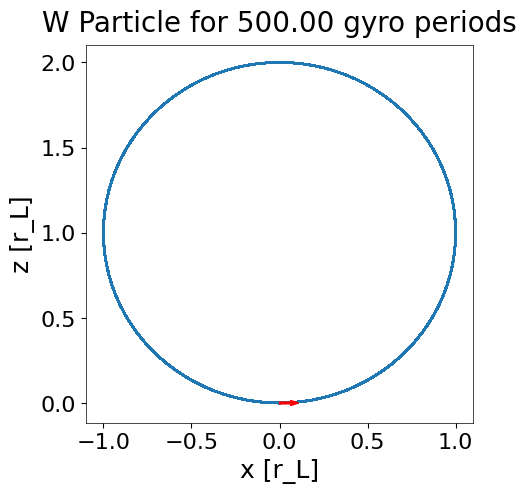

In [8]:
x0,y0,z0=r_ex1[0,:]
r_L=(np.sum(v_ex1[0,[0,2]]**2))**0.5/omega_cs(qs,B_char,ms)

plt.figure(figsize=(5,5),dpi=100)
plt.plot((r_ex1[:,0]-x0)/r_L,(r_ex1[:,2]-z0)/r_L,'-.')
plt.arrow((r_ex1[0,0]-x0)/r_L,(r_ex1[0,2]-z0)/r_L,v_ex1[0,0]*dt/r_L,v_ex1[0,2]*dt/r_L,width=0.01,color="red",zorder=10)
plt.plot()
# plt.xlim([-0.1,2.1])
# plt.ylim([-1.1,1.1])
plt.xlabel("x [r_L]")
plt.ylabel("z [r_L]")
plt.title(f"W Particle for {(N_tot/N_dt):.2f} gyro periods")



In [21]:
import os
path_wd=os.getcwd()
path_rel="/../Report/ErrorPlots/"

path_savefig=path_wd+path_rel

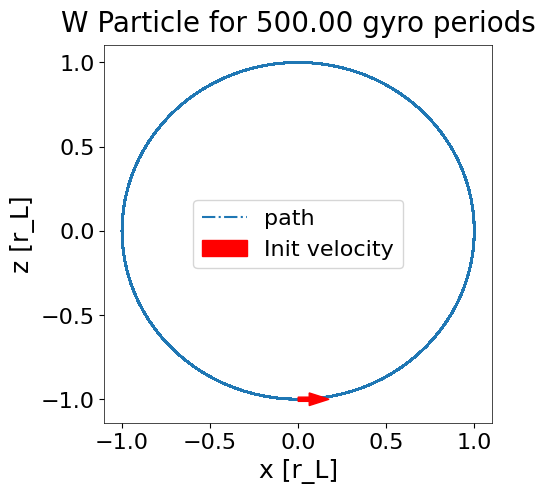

In [22]:
r_center=r_ex1-np.hstack((np.zeros(np.shape(r_ex1[:,0:2])),np.ones(np.shape(r_ex1[:,2])).reshape(-1,1)))*r_L # subtract (0,0,r_L) for each r_L vector (center of motion)

plt.figure(figsize=(5,5),dpi=100)
plt.plot((r_center[:,0])/r_L,(r_center[:,2]-z0)/r_L,'-.',label="path")
plt.arrow((r_center[0,0]-x0)/r_L,(r_center[0,2]-z0)/r_L,v_ex1[0,0]*dt/r_L,v_ex1[0,2]*dt/r_L,width=0.025,color="red",zorder=10,label="Init velocity")
plt.plot()
# plt.xlim([-0.1,2.1])
# plt.ylim([-1.1,1.1])
plt.xlabel("x [r_L]")
plt.ylabel("z [r_L]")
plt.legend() # wtf is going on with that one 
plt.title(f"W Particle for {(N_tot/N_dt):.2f} gyro periods")
# plt.savefig(path_savefig+"W_particle_500_periods_rmthis.pdf",bbox_inches="tight")

/var/folders/qw/d5v6_ftd4wvg1f8_ltt02lsc0000gp/T/ipykernel_49266/3100040217.py:17: RuntimeWarning: divide by zero encountered in log
  plt.loglog(Nt_g,np.exp(np.log(Nt_g)*fit[0]+fit[1]),'-.',color="red",label=f'linear fit, slope={fit[0]:.2f}',zorder=1)


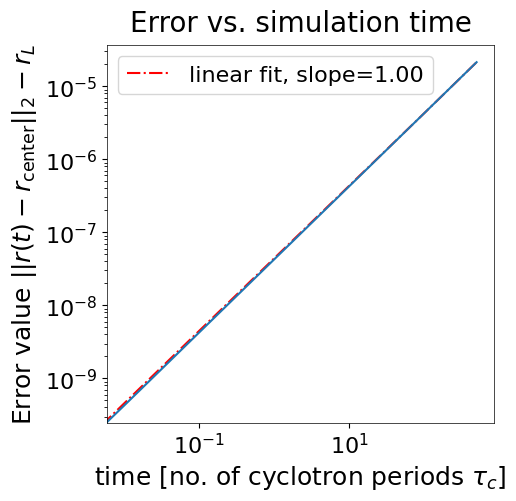

In [32]:
# get the last one # and only in xz plane
xz=[0,2]

L2=np.abs(np.linalg.norm(r_center[:,xz]/r_L,axis=1)-1) # should be =1
t_dt=np.arange(len(L2))
t_tau=t_dt/N_dt

# plt.plot(np.log10(range(len(L2))),np.log10(L2),'-.')

# model on top of plot
Nt_g=np.arange(np.min(t_tau)*0.9,np.max(t_tau)*1.1,100)
fit=np.polyfit(np.log(t_tau[1:]),np.log(L2[1:]),1)
fit # linear. 

plt.figure(figsize=(5,5),dpi=100)
plt.loglog(t_tau,L2,zorder=2)
plt.loglog(Nt_g,np.exp(np.log(Nt_g)*fit[0]+fit[1]),'-.',color="red",label=f'linear fit, slope={fit[0]:.2f}',zorder=1)
#
plt.xlabel(r"time [no. of cyclotron periods $\tau_c$]")
plt.ylabel(r'Error value $||r(t)-r_{\mathrm{center}}||_{2}-r_L$')
plt.title(r"Error vs. simulation time")
plt.legend()
# plt.savefig(path_savefig+"SimTime_rmthis.pdf",bbox_inches="tight")
# increases linearly

In [216]:
# np.log(t_tau[1:])


array([  0.99999733, -16.96888684])

In [33]:

N_dt=np.array([500,100,50,25,10])

dt=tau_cs(qs,B_char,ms)/N_dt
N_sim=500*N_dt

N_sim

dt=tau_cs(qs,B_char,ms)/N_dt
time=np.arange(0,500*tau_cs(qs,B_char,ms),dt[1])

In [34]:

N_dt=np.array([500,100,50,25,10]) # divide each tau_c into 500,100....
dt=tau_cs(qs,B_char,ms)/N_dt
dt

array([2.39435606e-08, 1.19717803e-07, 2.39435606e-07, 4.78871212e-07,
       1.19717803e-06])

In [35]:

# to reach same end time = 500 tau_c
N_tau=500

N_dt=np.array([400,300,200,100,50,25,10]) # divide each tau_c into 500,100....

dt=tau_cs(qs,B_char,ms)/N_dt
N_sim=N_tau*N_dt # to reach same end time

xz=[0,2]

r_error=[]
# v_ex1=[]
r_list=[]
for i,N_sim_i in enumerate(N_sim):
    p1=Particle('W',position=[0,0,0],velocity=[1e3,1e3,0])
    # re-initialize every loop 
    sys1=ParticleSystem([p1])
    model=f(B_choice=0,B_R0=B_char,R0=1)
    # setting the model
    dyn=RK4(sys1,model=model,timestep=dt[i])
    # works with just 1 Particle also
    dyn.run(N_sim_i)
    r=sys1.get_positions().reshape(3,)
    r_list.append(r)
    r_center=r-np.array([0,0,r_L])
    r_center_norm=r_center[xz]/r_L
    r_error.append(np.linalg.norm(r_center_norm)-1)


r_error=np.array(r_error)



[-4.79437355 41.05546753]


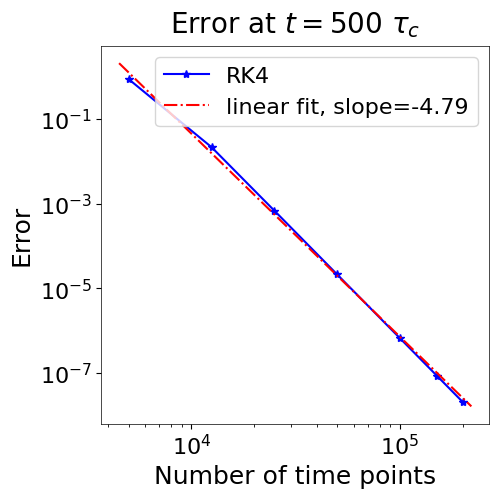

In [55]:
r_error
log_error=np.log(np.abs(r_error))


plt.figure(figsize=(5,5),dpi=100)
plt.loglog(N_sim,np.abs(r_error),'-*',color="blue",label="RK4")
plt.title(r"Error at $t= 500 ~\tau_c$")
plt.xlabel("Number of time points")
plt.ylabel("Error")

Nt_g=np.arange(np.min(N_sim)*0.9,np.max(N_sim)*1.1,100)


# hældning:
fit=np.polyfit(np.log(N_sim[1:]),log_error[1:],1)
print(fit)
plt.loglog(Nt_g,np.exp(np.log(Nt_g)*(fit[0])+fit[1]),'-.',color="red",label=f'linear fit, slope={fit[0]:.2f}')
plt.legend()
plt.savefig(path_savefig+"Truncation_error_rmthis.pdf",bbox_inches="tight")


In [182]:
np.exp(np.log(Nt_g)*-4.79437355+41.05546)

array([2.06678015e+00, 1.86007503e+00, 1.67784133e+00, ...,
       1.65380187e-08, 1.65019928e-08, 1.64660616e-08])

In [184]:

# returns highest power first, so slope of -4.82 


Particle(symbol='W', position=(nan, nan, nan), velocity=(nan, nan, nan) )

In [ ]:
# krumningsradius - af 3pts, i + NN => 
# f'' = (1/R1) # en fejl her ... # muligvis støj 
# for alle pts... -> center og radius 
# se at radius også er const i lang tid 

# yaksen - krum radius - vs tid => constant i tid
# gyrocenter => x=0, z bør vokse lineart => hastighed


### cyl transformation
# (x,y,z) => (R,Z,phi) =(interpolate)=> B(R,Z,phi),E(R,Z,phi) => B(x,y,z),E(x,y,z)
# evt hele grid ned og så få en fejl 
